In [2]:
import pandas as pd
import numpy as np
import collections as co
import statistics as st

from tensorflow import keras
from keras.models import load_model
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from matplotlib import ticker
import matplotlib.pyplot as plt


In [3]:
load_model_DFNN = load_model('DFNN_Model.h5')

In [4]:
df = pd.read_csv('./Data/CTLT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-07,109.879997,113.489998,109.559998,112.750000,112.750000,750900
1,2022-04-08,112.669998,113.180000,110.419998,110.709999,110.709999,957300
2,2022-04-11,109.580002,110.000000,106.610001,107.050003,107.050003,820400
3,2022-04-12,105.980003,107.099998,99.589996,100.059998,100.059998,1824800
4,2022-04-13,99.769997,101.919998,99.769997,100.879997,100.879997,875500
...,...,...,...,...,...,...,...
246,2023-03-31,65.080002,66.000000,64.510002,65.709999,65.709999,1069900
247,2023-04-03,64.650002,65.059998,62.459999,62.919998,62.919998,1708200
248,2023-04-04,63.000000,63.740002,62.220001,62.250000,62.250000,1435100
249,2023-04-05,61.599998,62.430000,61.060001,61.619999,61.619999,1471200


In [5]:
# Lấy ra các ngày cuối cùng
last_date = df['Date'].max()
# tạo ra list các ngày tiếp theo, với 30 ngày kể từ ngày bắt đầu và cách nhau 1 ngày.
future_dates = pd.date_range(start=pd.to_datetime(last_date) + pd.DateOffset(days=1), periods=30, freq='D')


In [6]:
future_dates

DatetimeIndex(['2023-04-07', '2023-04-08', '2023-04-09', '2023-04-10',
               '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14',
               '2023-04-15', '2023-04-16', '2023-04-17', '2023-04-18',
               '2023-04-19', '2023-04-20', '2023-04-21', '2023-04-22',
               '2023-04-23', '2023-04-24', '2023-04-25', '2023-04-26',
               '2023-04-27', '2023-04-28', '2023-04-29', '2023-04-30',
               '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04',
               '2023-05-05', '2023-05-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
# Lấy ra các giá trị 60 ngày cuối cùng
last_60_days = df.iloc[-60:, :]

last_60_days

,Date,Open,High,Low,Close,Adj Close,Volume
191,2023-01-11,49.029999,50.439999,48.480000,49.459999,49.459999,3258000
192,2023-01-12,49.389999,49.980000,48.590000,49.349998,49.349998,1789400
193,2023-01-13,48.820000,49.299999,48.220001,49.080002,49.080002,2013500
194,2023-01-17,48.779999,48.950001,47.540001,47.959999,47.959999,2268800
195,2023-01-18,48.389999,49.259998,48.119999,48.180000,48.180000,2225900
196,2023-01-19,47.750000,49.810001,46.775002,49.290001,49.290001,3611700
197,2023-01-20,49.340000,49.639999,48.360001,49.450001,49.450001,2004900
198,2023-01-23,49.330002,52.669998,49.009998,52.590000,52.590000,3373000
199,2023-01-24,52.099998,53.000000,49.119999,49.570000,49.570000,2926300
200,2023-01-25,49.000000,50.189999,48.389999,50.160000,50.160000,1174300


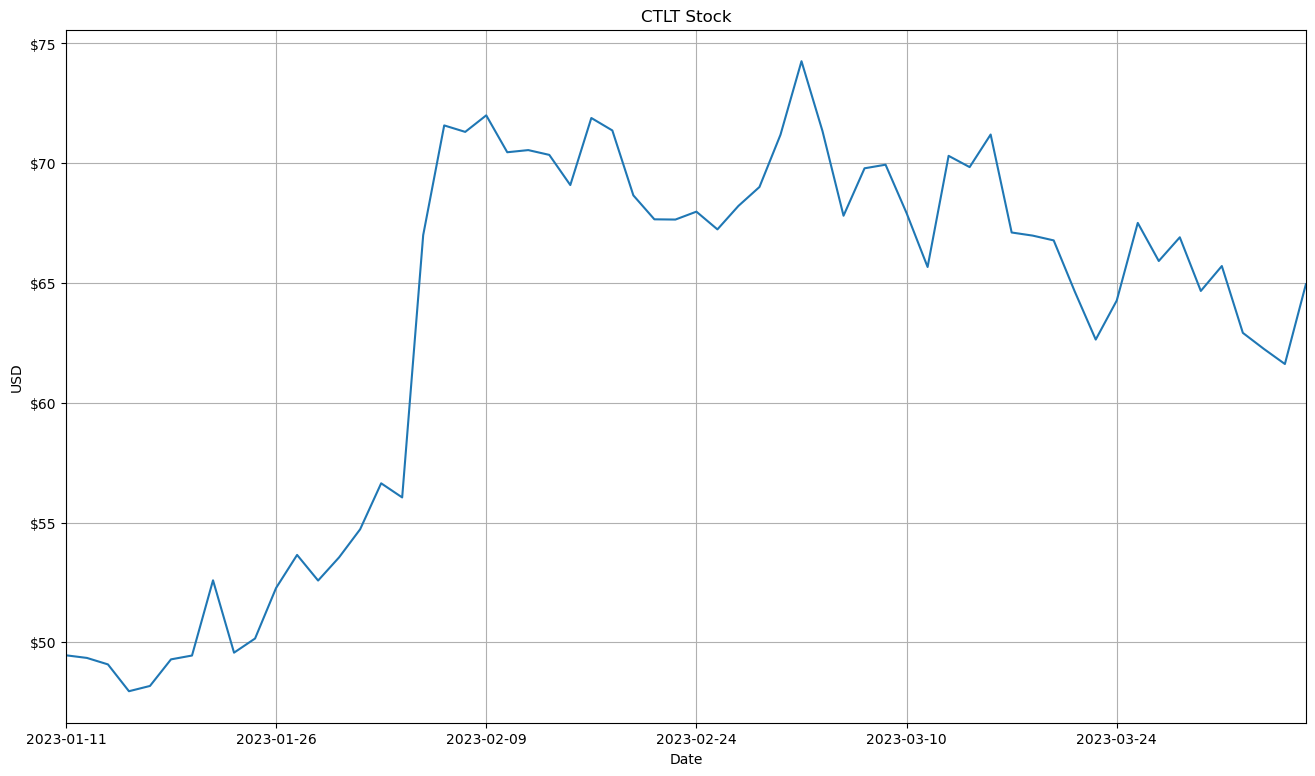

In [8]:
# Chuyển đổi kiểu dữ liệu của cột Date sang datetime64
#last_60_days['Date'] = pd.to_datetime(df['Date'])

# Đặt cột Date làm index của DataFrame
last_60_days.set_index('Date', inplace=True)

# Thư viện vẽ đồ thị
formatter = ticker.StrMethodFormatter('${x:,.0f}')
title = 'CTLT Stock'
ylabel = 'USD'
xlabel = 'Date'

# Vẽ biểu đồ theo index của DataFrame
ax = last_60_days['Close'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

# Hiển thị biểu đồ
plt.show()

In [9]:
# Tạo prediction list
predictions = []

In [10]:
# Dự đoán giá 30 ngày tới
for i in range(30):
    # Lấy ra dữ liệu 60 ngày cuối
    X = last_60_days[['Open', 'High', 'Low', 'Volume']]
    y = last_60_days['Close']

    # Dự đoán ngày tiếp theo
    next_day = load_model_DFNN.predict(X.iloc[-1, :].values.reshape(1,-1))

    # Đưa giá trị dữ đoán vào list dự đoán
    predictions.append(next_day[0])

    # Dịch chuyển khung frame
    last_60_days = last_60_days.shift(1)

    # Đặt Close của ngày đầu tiên thành giá trị dự đoán
    last_60_days.iloc[0, -1] = next_day[0]



1/1 [==============================] - 0s 74ms/step


In [11]:
print(predictions)

[array([16891950.], dtype=float32), array([13400709.], dtype=float32), array([13071908.], dtype=float32), array([15559413.], dtype=float32), array([9745554.], dtype=float32), array([11143709.], dtype=float32), array([5044743.], dtype=float32), array([8960426.], dtype=float32), array([18426736.], dtype=float32), array([12543623.], dtype=float32), array([20270258.], dtype=float32), array([11965274.], dtype=float32), array([12724919.], dtype=float32), array([12588289.], dtype=float32), array([37925012.], dtype=float32), array([10165487.], dtype=float32), array([16837354.], dtype=float32), array([22806050.], dtype=float32), array([28353026.], dtype=float32), array([18237308.], dtype=float32), array([21723992.], dtype=float32), array([13060110.], dtype=float32), array([12908934.], dtype=float32), array([10502528.], dtype=float32), array([17541448.], dtype=float32), array([14060214.], dtype=float32), array([11042607.], dtype=float32), array([17963130.], dtype=float32), array([9247352.], dtyp

In [12]:
# Tạo dataframe chứa dữ liệu 30 ngày tới
future_data = pd.DataFrame({'Date': future_dates,
                            'Close': predictions,
                            })
# Sort Date
future_data = future_data.sort_values(by='Date')

future_data.set_index('Date', inplace=True)

In [18]:
future_data

,Close
Date,
2023-04-07,[16891950.0]
2023-04-08,[13400709.0]
2023-04-09,[13071908.0]
2023-04-10,[15559413.0]
2023-04-11,[9745554.0]
2023-04-12,[11143709.0]
2023-04-13,[5044743.0]
2023-04-14,[8960426.0]
2023-04-15,[18426736.0]


In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-07,109.879997,113.489998,109.559998,112.750000,112.750000,750900
1,2022-04-08,112.669998,113.180000,110.419998,110.709999,110.709999,957300
2,2022-04-11,109.580002,110.000000,106.610001,107.050003,107.050003,820400
3,2022-04-12,105.980003,107.099998,99.589996,100.059998,100.059998,1824800
4,2022-04-13,99.769997,101.919998,99.769997,100.879997,100.879997,875500
...,...,...,...,...,...,...,...
246,2023-03-31,65.080002,66.000000,64.510002,65.709999,65.709999,1069900
247,2023-04-03,64.650002,65.059998,62.459999,62.919998,62.919998,1708200
248,2023-04-04,63.000000,63.740002,62.220001,62.250000,62.250000,1435100
249,2023-04-05,61.599998,62.430000,61.060001,61.619999,61.619999,1471200


<function matplotlib.pyplot.legend(*args, **kwargs)>

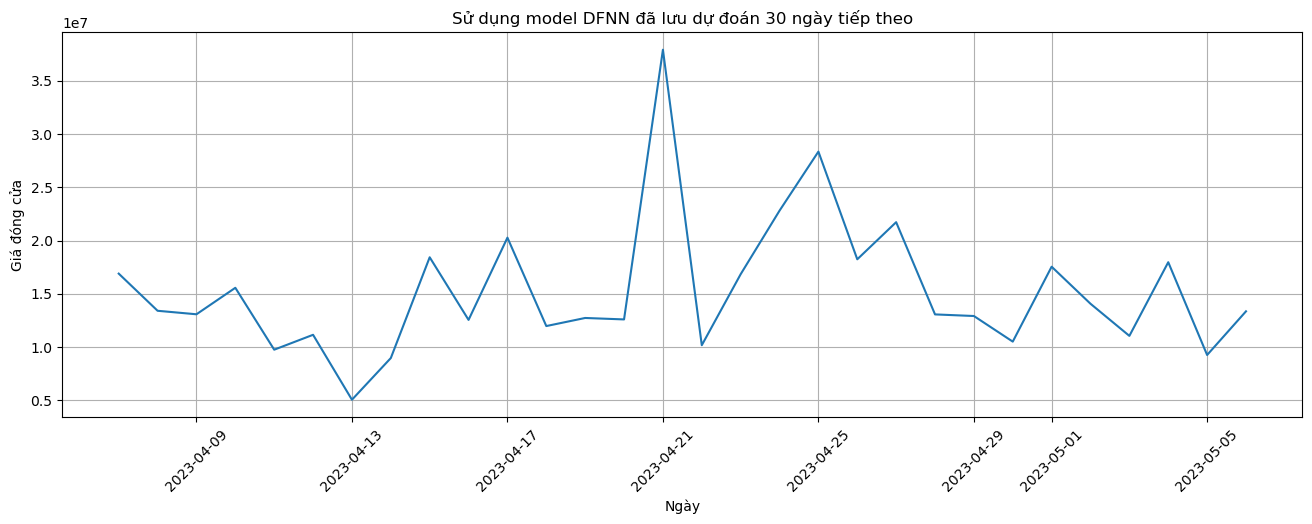

In [14]:
# Trực quan hóa
plt.figure(figsize=(16,5))
plt.plot(future_data.index, predictions, label='Dự đoán')
plt.xticks(rotation=45)
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('Sử dụng model DFNN đã lưu dự đoán 30 ngày tiếp theo')
plt.grid()
plt.legend

In [15]:
# Lấy dữ liệu thực tế
df_actual = pd.read_csv('./Data/CTLT.csv', index_col='Date', parse_dates=['Date'])
y_actual = df_actual['Close'].values
y_pred = future_data['Close'].values

# Tạo biểu đồ
x_actual = np.arange(len(y_actual))
X_pred = np.arange(len(y_actual), len(y_actual) + len(y_pred))


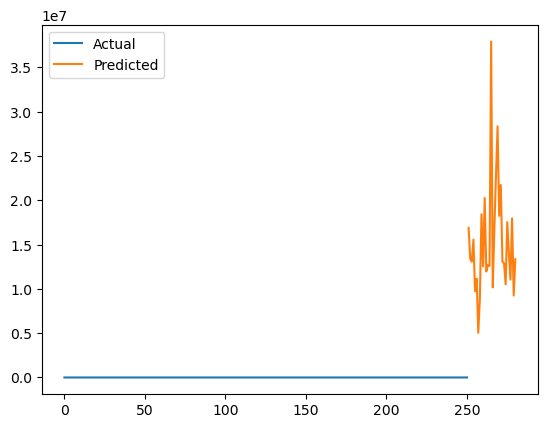

In [16]:
plt.plot(x_actual, y_actual, label='Actual')
plt.plot(X_pred, y_pred, label='Predicted')
plt.legend()
plt.show()